In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

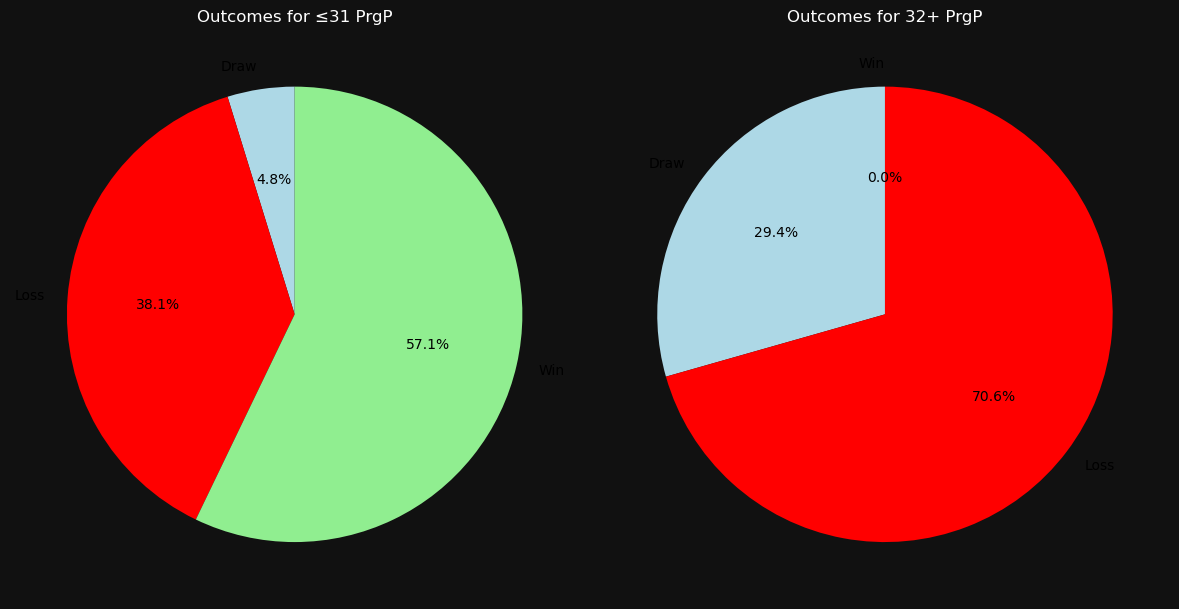

In [ ]:
xls = pd.ExcelFile("wolves_passing_matchlogs.xlsx")
df = pd.read_excel(xls, sheet_name="wolves_passing_matchlogs")
df['PrgP Category'] = df['PrgP'].apply(lambda x: '≤31 PrgP' if x <= 31 else '32+ PrgP')
df['Outcome'] = df['Result'].map({'W': 'Win', 'D': 'Draw', 'L': 'Loss'})
customColors = {'Win': 'lightgreen', 'Draw': 'lightblue', 'Loss': 'red'}
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.edgecolor': 'gray',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'legend.edgecolor': 'gray',
})

outcomeCounts = df.groupby('PrgP Category')['Outcome'].value_counts().unstack().fillna(0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='#111111')
for i, category in enumerate(['≤31 PrgP', '32+ PrgP']):
    counts = outcomeCounts.loc[category]
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=[customColors[label] for label in counts.index],
        startangle=90,
        textprops={'color': 'black'}
    )
    axes[i].set_title(f'Outcomes for {category}', color='white')
    axes[i].set_facecolor('#111111')

plt.tight_layout()
plt.show()

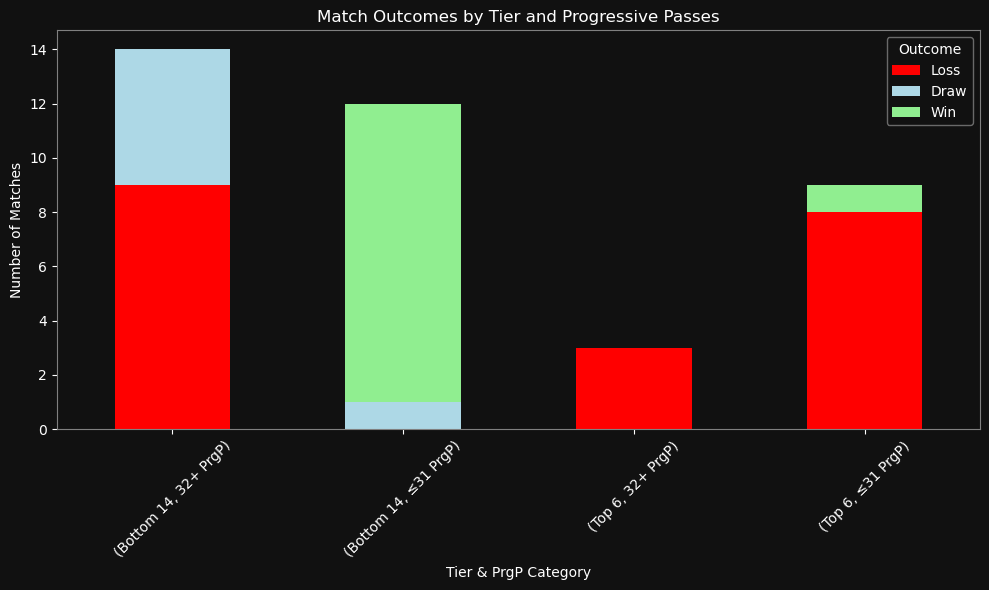

In [ ]:
tierCounts = df.groupby(['Tier', 'PrgP Category', 'Outcome']).size().unstack().fillna(0)
tierCounts = tierCounts[['Loss', 'Draw', 'Win']]

ax = tierCounts.plot(
    kind='bar',
    stacked=True,
    color=[customColors['Loss'], customColors['Draw'], customColors['Win']],
    figsize=(10, 6)
)

ax.set_facecolor('#111111')
ax.figure.set_facecolor('#111111')
ax.set_title('Match Outcomes by Tier and Progressive Passes', color='white')
ax.set_ylabel('Number of Matches', color='white')
ax.set_xlabel('Tier & PrgP Category', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

legend = ax.legend(title='Outcome', facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.tight_layout()
plt.show()

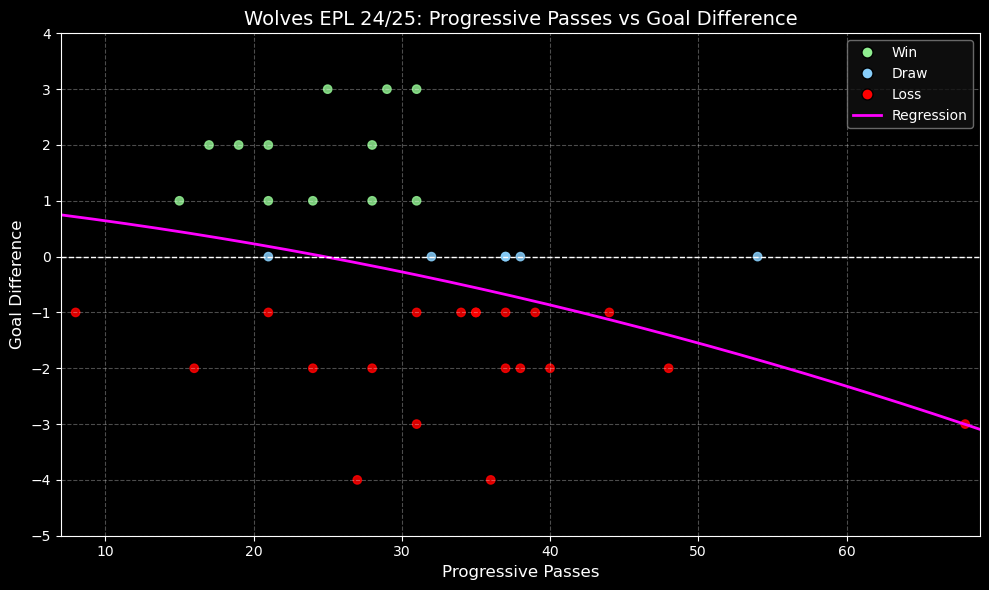

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

df = pd.read_excel('wolves_passing_matchlogs.xlsx')

df = df.iloc[:-1]

df['Goal Difference'] = df['GF'] - df['GA']

def get_outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(get_outcome, axis=1)

outcome_colors = {
    'Win': 'lightgreen',
    'Draw': 'lightskyblue',
    'Loss': 'red'
}
df['Color'] = df['Outcome'].map(outcome_colors)

coeffs = np.polyfit(df['PrgP'], df['Goal Difference'], deg=2)
poly = np.poly1d(coeffs)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df['PrgP'], df['Goal Difference'], color=df['Color'], alpha=0.85)

x_min, x_max = df['PrgP'].min() - 1, df['PrgP'].max() + 1
x_vals = np.linspace(x_min, x_max, 200)
y_vals = poly(x_vals)
ax.plot(x_vals, y_vals, color='magenta', linewidth=2)

ax.axhline(0, color='white', linestyle='--', linewidth=1)

ax.set_title('Wolves EPL 24/25: Progressive Passes vs Goal Difference', fontsize=14, color='white')
ax.set_xlabel('Progressive Passes', fontsize=12, color='white')
ax.set_ylabel('Goal Difference', fontsize=12, color='white')

ax.set_xlim(x_min, x_max)
y_min, y_max = df['Goal Difference'].min() - 1, df['Goal Difference'].max() + 1
ax.set_ylim(y_min, y_max)

ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

custom_legend = [
    Line2D([0], [0], marker='o', color='none', label='Win', markerfacecolor='lightgreen', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Draw', markerfacecolor='lightskyblue', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Loss', markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='magenta', linewidth=2, label='Regression')
]
legend = ax.legend(handles=custom_legend, facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')

plt.tight_layout()
plt.show()


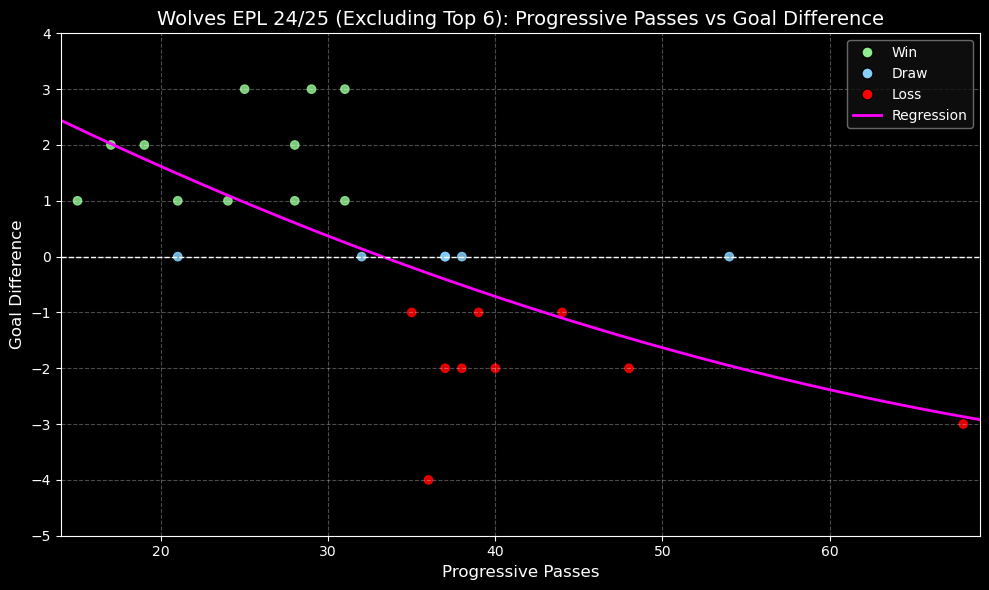

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

df = pd.read_excel('wolves_passing_matchlogs.xlsx')

df = df.iloc[:-1]

df = df[df['Tier'] != 'Top 6']

df['Goal Difference'] = df['GF'] - df['GA']

def get_outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(get_outcome, axis=1)

outcome_colors = {
    'Win': 'lightgreen',
    'Draw': 'lightskyblue',
    'Loss': 'red'
}
df['Color'] = df['Outcome'].map(outcome_colors)

coeffs = np.polyfit(df['PrgP'], df['Goal Difference'], deg=2)
poly = np.poly1d(coeffs)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df['PrgP'], df['Goal Difference'], color=df['Color'], alpha=0.85)

x_min, x_max = df['PrgP'].min() - 1, df['PrgP'].max() + 1
x_vals = np.linspace(x_min, x_max, 200)
y_vals = poly(x_vals)
ax.plot(x_vals, y_vals, color='magenta', linewidth=2)

ax.axhline(0, color='white', linestyle='--', linewidth=1)

ax.set_title('Wolves EPL 24/25: Progressive Passes vs Goal Difference (Bottom 14)', fontsize=14, color='white')
ax.set_xlabel('Progressive Passes', fontsize=12, color='white')
ax.set_ylabel('Goal Difference', fontsize=12, color='white')

ax.set_xlim(x_min, x_max)
y_min, y_max = df['Goal Difference'].min() - 1, df['Goal Difference'].max() + 1
ax.set_ylim(y_min, y_max)

ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

custom_legend = [
    Line2D([0], [0], marker='o', color='none', label='Win', markerfacecolor='lightgreen', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Draw', markerfacecolor='lightskyblue', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Loss', markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='magenta', linewidth=2, label='Regression')
]
legend = ax.legend(handles=custom_legend, facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')

plt.tight_layout()
plt.show()
